### Starting code

In [2]:
# experimental: you can run this cell to see your code full-width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#  run this cell without changing it. It only works on Noteable.
! printf "\n\nLink below can be send to someone to share your Noteable session:\n\nhttps://noteable.edina.ac.uk/user/$(jupyter notebook list | grep -oP '(?<=user\/).*(?=\/\?)' )/tree?token=$( jupyter notebook list | grep -oP '(?<=token=).*(?= ::)' )\n\n"



Link below can be send to someone to share your Noteable session:

https://noteable.edina.ac.uk/user/3hg6fdvjsmjm4xveommxct/tree?token=AkPFq9_dSXqtCy1PIW3XGQ



In [4]:
# the usual imports
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import pprint as pp
from datetime import datetime, timedelta, date, timezone
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [5]:
# more info: https://www.opendata.nhs.scot/dataset/care-home-census/resource/139f61d8-a87d-419d-b7af-31f555a60c89
url = "https://www.opendata.nhs.scot/dataset/75cca0a9-780d-40e0-9e1f-5f4796950794/resource/139f61d8-a87d-419d-b7af-31f555a60c89/download/file3_mean_median_age_years.csv"

In [6]:
nursing_home_ages=pd.read_csv(url)

In [7]:
nursing_home_ages.head(10)

,Date,KeyStatistic,CA,MainClientGroup,Sector,Unit,Value,ValueQF
0,20100331,Mean Age,S12000005,All Adults,All Sectors,Years,65.0,NaN
1,20100331,Mean Age,S12000006,All Adults,All Sectors,Years,83.0,NaN
2,20100331,Mean Age,S12000008,All Adults,All Sectors,Years,79.0,NaN
3,20100331,Mean Age,S12000010,All Adults,All Sectors,Years,85.0,NaN
4,20100331,Mean Age,S12000011,All Adults,All Sectors,Years,84.0,NaN
5,20100331,Mean Age,S12000013,All Adults,All Sectors,Years,83.0,NaN
6,20100331,Mean Age,S12000014,All Adults,All Sectors,Years,79.0,NaN
7,20100331,Mean Age,S12000017,All Adults,All Sectors,Years,78.0,NaN
8,20100331,Mean Age,S12000018,All Adults,All Sectors,Years,80.0,NaN
9,20100331,Mean Age,S12000019,All Adults,All Sectors,Years,78.0,NaN


In [8]:
nursing_home_ages.tail(6)

,Date,KeyStatistic,CA,MainClientGroup,Sector,Unit,Value,ValueQF
5298,20220331,Median Age At Discharge,S12000045,Older People Aged 65 and Older,All Sectors,Years,87.0,NaN
5299,20220331,Median Age At Discharge,S12000047,Older People Aged 65 and Older,All Sectors,Years,87.0,NaN
5300,20220331,Median Age At Discharge,S12000048,Older People Aged 65 and Older,All Sectors,Years,88.0,NaN
5301,20220331,Median Age At Discharge,S12000049,Older People Aged 65 and Older,All Sectors,Years,85.0,NaN
5302,20220331,Median Age At Discharge,S12000050,Older People Aged 65 and Older,All Sectors,Years,85.0,NaN
5303,20220331,Median Age At Discharge,S92000003,Older People Aged 65 and Older,All Sectors,Years,87.0,NaN


In [9]:
set(nursing_home_ages['MainClientGroup'])

{'All Adults',
 'Learning Disabilities',
 'Mental Health Problems',
 'Older People Aged 65 and Older',
 'Physical and Sensory Impairment'}

In [10]:
set(nursing_home_ages['KeyStatistic'])

{'Mean Age',
 'Mean Age At Admission',
 'Mean Age At Discharge',
 'Median Age',
 'Median Age At Admission',
 'Median Age At Discharge'}

In [11]:
nursing_home_ages[nursing_home_ages['KeyStatistic']=='Mean Age']

,Date,KeyStatistic,CA,MainClientGroup,Sector,Unit,Value,ValueQF
0,20100331,Mean Age,S12000005,All Adults,All Sectors,Years,65.0,NaN
1,20100331,Mean Age,S12000006,All Adults,All Sectors,Years,83.0,NaN
2,20100331,Mean Age,S12000008,All Adults,All Sectors,Years,79.0,NaN
3,20100331,Mean Age,S12000010,All Adults,All Sectors,Years,85.0,NaN
4,20100331,Mean Age,S12000011,All Adults,All Sectors,Years,84.0,NaN
...,...,...,...,...,...,...,...,...
4960,20220331,Mean Age,S12000048,Older People Aged 65 and Older,All Sectors,Years,84.0,NaN
4961,20220331,Mean Age,S12000049,Older People Aged 65 and Older,All Sectors,Years,81.0,NaN
4962,20220331,Mean Age,S12000050,Older People Aged 65 and Older,All Sectors,Years,83.0,NaN
4963,20220331,Mean Age,S92000003,Older People Aged 65 and Older,All Sectors,Years,83.0,NaN


In [12]:
nursing_home_ages['KeyStatistic']=='Mean Age'

0        True
1        True
2        True
3        True
4        True
        ...  
5299    False
5300    False
5301    False
5302    False
5303    False
Name: KeyStatistic, Length: 5304, dtype: bool

In [13]:
nursing_home_ages[nursing_home_ages['KeyStatistic']=='Mean Age'].tail(6)

,Date,KeyStatistic,CA,MainClientGroup,Sector,Unit,Value,ValueQF
4959,20220331,Mean Age,S12000047,Older People Aged 65 and Older,All Sectors,Years,82.0,NaN
4960,20220331,Mean Age,S12000048,Older People Aged 65 and Older,All Sectors,Years,84.0,NaN
4961,20220331,Mean Age,S12000049,Older People Aged 65 and Older,All Sectors,Years,81.0,NaN
4962,20220331,Mean Age,S12000050,Older People Aged 65 and Older,All Sectors,Years,83.0,NaN
4963,20220331,Mean Age,S92000003,Older People Aged 65 and Older,All Sectors,Years,83.0,NaN
4964,20220331,Mean Age,S92000003,Physical and Sensory Impairment,All Sectors,Years,54.0,NaN


In [14]:
nursing_home_ages_mean_overall = nursing_home_ages[nursing_home_ages['KeyStatistic']=='Mean Age'].copy()

In [15]:
nursing_home_ages_mean_overall

,Date,KeyStatistic,CA,MainClientGroup,Sector,Unit,Value,ValueQF
0,20100331,Mean Age,S12000005,All Adults,All Sectors,Years,65.0,NaN
1,20100331,Mean Age,S12000006,All Adults,All Sectors,Years,83.0,NaN
2,20100331,Mean Age,S12000008,All Adults,All Sectors,Years,79.0,NaN
3,20100331,Mean Age,S12000010,All Adults,All Sectors,Years,85.0,NaN
4,20100331,Mean Age,S12000011,All Adults,All Sectors,Years,84.0,NaN
...,...,...,...,...,...,...,...,...
4960,20220331,Mean Age,S12000048,Older People Aged 65 and Older,All Sectors,Years,84.0,NaN
4961,20220331,Mean Age,S12000049,Older People Aged 65 and Older,All Sectors,Years,81.0,NaN
4962,20220331,Mean Age,S12000050,Older People Aged 65 and Older,All Sectors,Years,83.0,NaN
4963,20220331,Mean Age,S92000003,Older People Aged 65 and Older,All Sectors,Years,83.0,NaN


In [16]:
nursing_home_ages_mean_overall.groupby('CA').mean('Value')

,Date,Value
CA,,
S12000005,20160331.0,77.375000
S12000006,20160331.0,84.000000
S12000008,20160331.0,80.916667
S12000010,20160331.0,85.125000
S12000011,20160331.0,83.750000
S12000013,20160331.0,83.833333
S12000014,20160331.0,81.833333
S12000017,20160331.0,81.375000
S12000018,20160331.0,82.125000


In [17]:
type(nursing_home_ages_mean_overall['Date'])

pandas.core.series.Series

In [18]:
nursing_home_ages_mean_overall.mean()

/tmp/ipykernel_70/1780965726.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nursing_home_ages_mean_overall.mean()


Date     2.016033e+07
Value    8.119565e+01
dtype: float64

In [19]:
nursing_home_ages_mean_overall_ca = nursing_home_ages_mean_overall.groupby('CA').mean('Value').copy()

In [20]:
nursing_home_ages_mean_overall_ca

,Date,Value
CA,,
S12000005,20160331.0,77.375000
S12000006,20160331.0,84.000000
S12000008,20160331.0,80.916667
S12000010,20160331.0,85.125000
S12000011,20160331.0,83.750000
S12000013,20160331.0,83.833333
S12000014,20160331.0,81.833333
S12000017,20160331.0,81.375000
S12000018,20160331.0,82.125000


In [21]:
# importing Geo code and labels
url_ca = "https://www.opendata.nhs.scot/dataset/9f942fdb-e59e-44f5-b534-d6e17229cc7b/resource/967937c4-8d67-4f39-974f-fd58c4acfda5/download/ca11_ca19.csv"

In [22]:
ca_lookup = pd.read_csv(url_ca)

In [23]:
ca_lookup

,CA,CAName,CADateEnacted,CADateArchived,HSCP,HSCPName,HSCPDateEnacted,HSCPDateArchived,HB,HBName,HBDateEnacted,HBDateArchived,Country
0,S12000005,Clackmannanshire,19960401,NaN,S37000005,Clackmannanshire and Stirling,20160401,NaN,S08000019,NHS Forth Valley,20140401,NaN,S92000003
1,S12000006,Dumfries and Galloway,19960401,NaN,S37000006,Dumfries and Galloway,20160401,NaN,S08000017,NHS Dumfries and Galloway,20140401,NaN,S92000003
2,S12000008,East Ayrshire,19960401,NaN,S37000008,East Ayrshire,20150402,NaN,S08000015,NHS Ayrshire and Arran,20140401,NaN,S92000003
3,S12000010,East Lothian,19960401,NaN,S37000010,East Lothian,20160401,NaN,S08000024,NHS Lothian,20140401,NaN,S92000003
4,S12000011,East Renfrewshire,19960401,NaN,S37000011,East Renfrewshire,20151007,NaN,S08000021,NHS Greater Glasgow and Clyde,20140401,20190331.0,S92000003
5,S12000011,East Renfrewshire,19960401,NaN,S37000011,East Renfrewshire,20151007,NaN,S08000031,NHS Greater Glasgow and Clyde,20190401,NaN,S92000003
6,S12000013,Na h-Eileanan Siar,19960401,NaN,S37000031,Western Isles,20160401,NaN,S08000028,NHS Western Isles,20140401,NaN,S92000003
7,S12000014,Falkirk,19960401,NaN,S37000013,Falkirk,20160401,NaN,S08000019,NHS Forth Valley,20140401,NaN,S92000003
8,S12000015,Fife,19960401,20180201.0,S37000014,Fife,20160401,20180201.0,S08000018,NHS Fife,20140401,20180201.0,S92000003
9,S12000017,Highland,19960401,NaN,S37000016,Highland,20150401,NaN,S08000022,NHS Highland,20140401,NaN,S92000003


In [24]:
ca_lookup_simple = ca_lookup[['CA', 'CAName', 'HBName']]
ca_lookup_simple

,CA,CAName,HBName
0,S12000005,Clackmannanshire,NHS Forth Valley
1,S12000006,Dumfries and Galloway,NHS Dumfries and Galloway
2,S12000008,East Ayrshire,NHS Ayrshire and Arran
3,S12000010,East Lothian,NHS Lothian
4,S12000011,East Renfrewshire,NHS Greater Glasgow and Clyde
5,S12000011,East Renfrewshire,NHS Greater Glasgow and Clyde
6,S12000013,Na h-Eileanan Siar,NHS Western Isles
7,S12000014,Falkirk,NHS Forth Valley
8,S12000015,Fife,NHS Fife
9,S12000017,Highland,NHS Highland


In [25]:
print(nursing_home_ages_mean_overall)

          Date KeyStatistic         CA                  MainClientGroup  \
0     20100331     Mean Age  S12000005                       All Adults   
1     20100331     Mean Age  S12000006                       All Adults   
2     20100331     Mean Age  S12000008                       All Adults   
3     20100331     Mean Age  S12000010                       All Adults   
4     20100331     Mean Age  S12000011                       All Adults   
...        ...          ...        ...                              ...   
4960  20220331     Mean Age  S12000048   Older People Aged 65 and Older   
4961  20220331     Mean Age  S12000049   Older People Aged 65 and Older   
4962  20220331     Mean Age  S12000050   Older People Aged 65 and Older   
4963  20220331     Mean Age  S92000003   Older People Aged 65 and Older   
4964  20220331     Mean Age  S92000003  Physical and Sensory Impairment   

           Sector   Unit  Value ValueQF  
0     All Sectors  Years   65.0     NaN  
1     All Secto

In [26]:
nursing_home_ages_mean_overall_ca

,Date,Value
CA,,
S12000005,20160331.0,77.375000
S12000006,20160331.0,84.000000
S12000008,20160331.0,80.916667
S12000010,20160331.0,85.125000
S12000011,20160331.0,83.750000
S12000013,20160331.0,83.833333
S12000014,20160331.0,81.833333
S12000017,20160331.0,81.375000
S12000018,20160331.0,82.125000


In [27]:
ca_lookup_simple = ca_lookup_simple.drop_duplicates()

In [28]:
results = nursing_home_ages_mean_overall_ca.merge(ca_lookup_simple, left_on = 'CA', right_on = 'CA')
results

,CA,Date,Value,CAName,HBName
0,S12000005,20160331.0,77.375000,Clackmannanshire,NHS Forth Valley
1,S12000006,20160331.0,84.000000,Dumfries and Galloway,NHS Dumfries and Galloway
2,S12000008,20160331.0,80.916667,East Ayrshire,NHS Ayrshire and Arran
3,S12000010,20160331.0,85.125000,East Lothian,NHS Lothian
4,S12000011,20160331.0,83.750000,East Renfrewshire,NHS Greater Glasgow and Clyde
5,S12000013,20160331.0,83.833333,Na h-Eileanan Siar,NHS Western Isles
6,S12000014,20160331.0,81.833333,Falkirk,NHS Forth Valley
7,S12000017,20160331.0,81.375000,Highland,NHS Highland
8,S12000018,20160331.0,82.125000,Inverclyde,NHS Greater Glasgow and Clyde
9,S12000019,20160331.0,79.541667,Midlothian,NHS Lothian


In [29]:
# sort data by values
results.sort_values(by=['Value'], ascending=False, inplace=True)

Text(0, 0.5, 'Age')

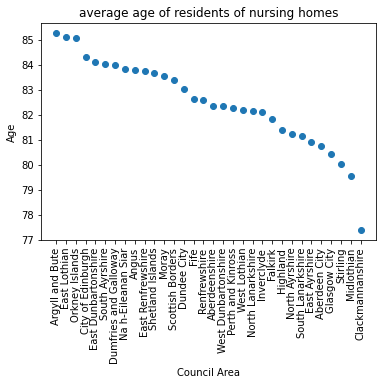

In [38]:
# make a colummn plot
# x = CAName
# y = Value

fig = plt.subplot()
plt.xticks(rotation=90)
plt.scatter(x=results['CAName'], y=results['Value'])
plt.title('average age of residents of nursing homes')
plt.xlabel('Council Area')
plt.ylabel('Age')
